__________STATS__________
Values from softmax layer: [[9.5192361e-01 8.2926395e-05 1.1566445e-02 1.5297283e-03 2.9231789e-02
  5.1458548e-03 4.2256271e-04 6.8519519e-05 1.2246657e-05 1.6387166e-05]]
Highest softmax value: 0.9519236087799072
Threshold Softmax Value: 0.85
Percentage difference between the Highest and Average Values: 10.50504446029663%

__________PREDICTION__________
Prediction is Plane 


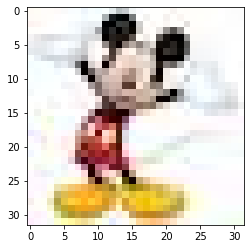

In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.keras import layers, models

model = models.load_model('image_classifier.model')


img = cv.imread('mickeyMouse.jpg')

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img, cmap=plt.cm.binary)

prediction = model.predict(np.array([img]) / 255)
class_names = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

index = np.argmax(prediction)
maxValue = np.max(prediction)
meanValue = np.mean(prediction)
maxDeviationPercent = (meanValue / maxValue) * 100


print('__________STATS__________')
print(f"Values from softmax layer: {prediction}")
print(f"Highest softmax value: {maxValue}")
print(f"Threshold Softmax Value: 0.85")
print(f"Percentage difference between the Highest and Average Values: {maxDeviationPercent}%")
print()

print("__________PREDICTION__________")
if maxDeviationPercent < 14.5 and maxValue > 0.85:
    print(f'Prediction is {class_names[index]} ')
else:
    print('Image is not recognized by Neural Network')
    print(f'Neural network thinks this is a {class_names[index]}')
